In [93]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, silhouette_samples, silhouette_score
from sklearn.linear_model import LinearRegression
from sklearn.cluster import KMeans
import sklearn
import statsmodels
import statsmodels.formula.api as sm
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
import copy
import requests
import pprint
import xgboost
import scipy
import warnings
import re
from datetime import datetime
from scipy import stats
from xgboost import XGBClassifier
from urllib import parse
from bs4 import BeautifulSoup

# ÏßÄÏàò ÌòïÌÉúÏùò Ïã§ÏàòÎ•º ÏÜåÏàòÏ†ê 3ÏûêÎ¶¨ÍπåÏßÄ ÌëúÍ∏∞
pd.options.display.float_format = "{:.3f}".format

# Í≥µÏú† Ìè¥Îçî Í≤ΩÎ°ú
dirShare = ".."

# Í≤ΩÍ≥† Ï∂úÎ†• Î¨¥Ïãú
warnings.filterwarnings("ignore")

In [94]:
# ÎùºÏù¥Î∏åÎü¨Î¶¨ Î≤ÑÏ†Ñ ÌôïÏù∏
print("pandas ÌòÑÏû¨ Î≤ÑÏ†Ñ : " + pd.__version__)
print("scikit-learn ÌòÑÏû¨ Î≤ÑÏ†Ñ : " + sklearn.__version__)
print("scipy ÌòÑÏû¨ Î≤ÑÏ†Ñ : "+ scipy.__version__)
print("statsmodels ÌòÑÏû¨ Î≤ÑÏ†Ñ : " + statsmodels.__version__)
print("xgboost ÌòÑÏû¨ Î≤ÑÏ†Ñ : " + xgboost.__version__)

pandas ÌòÑÏû¨ Î≤ÑÏ†Ñ : 2.0.3
scikit-learn ÌòÑÏû¨ Î≤ÑÏ†Ñ : 1.3.0
scipy ÌòÑÏû¨ Î≤ÑÏ†Ñ : 1.11.1
statsmodels ÌòÑÏû¨ Î≤ÑÏ†Ñ : 0.14.0
xgboost ÌòÑÏû¨ Î≤ÑÏ†Ñ : 1.7.6


# Îç∞Ïù¥ÌÑ∞ Î∂àÎü¨Ïò§Í≥† Ï†ÑÏ≤òÎ¶¨

## Í∏∞Î≥∏Ï†ÑÏ≤òÎ¶¨

In [95]:
# train.csv Îç∞Ïù¥ÌÑ∞ ÌîÑÎ†àÏûÑÏúºÎ°ú Î∂àÎü¨Ïò§Í∏∞
df = pd.read_csv(dirShare+"/data/train.csv")

# df Ï†ïÎ≥¥ ÌôïÏù∏
df.info()

# df ÏÉÅÏúÑ 10Í∞ú Î∂àÎü¨Ïò§Í∏∞
# df.head(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 58 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   inst_id             301 non-null    int64  
 1   OC                  301 non-null    object 
 2   sido                301 non-null    object 
 3   sgg                 301 non-null    int64  
 4   openDate            301 non-null    int64  
 5   bedCount            296 non-null    float64
 6   instkind            300 non-null    object 
 7   revenue1            293 non-null    float64
 8   salescost1          293 non-null    float64
 9   sga1                293 non-null    float64
 10  salary1             293 non-null    float64
 11  noi1                293 non-null    float64
 12  noe1                293 non-null    float64
 13  interest1           293 non-null    float64
 14  ctax1               293 non-null    float64
 15  profit1             293 non-null    float64
 16  liquidAs

In [96]:
df_t = pd.read_csv(dirShare+"/data/test.csv")

df_t.info()
df_t.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 127 entries, 0 to 126
Data columns (total 58 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   inst_id             127 non-null    int64  
 1   OC                  0 non-null      float64
 2   sido                127 non-null    object 
 3   sgg                 127 non-null    int64  
 4   openDate            126 non-null    float64
 5   bedCount            119 non-null    float64
 6   instkind            125 non-null    object 
 7   revenue1            125 non-null    float64
 8   salescost1          125 non-null    float64
 9   sga1                125 non-null    float64
 10  salary1             125 non-null    float64
 11  noi1                125 non-null    float64
 12  noe1                125 non-null    float64
 13  interest1           125 non-null    float64
 14  ctax1               125 non-null    float64
 15  profit1             125 non-null    float64
 16  liquidAs

inst_id  OC     sido  sgg     openDate  bedCount          instkind  \
0        2 NaN  incheon  139 19981125.000   300.000  general_hospital   
1        5 NaN     jeju  149 20160309.000    44.000          hospital   
2        6 NaN  jeonnam  103 19890427.000   276.000  general_hospital   
3        8 NaN    busan   71 20100226.000   363.000  general_hospital   
4       10 NaN  jeonbuk   26 20040604.000   213.000  general_hospital   

         revenue1     salescost1            sga1  ...           debt2  \
0 66824864410.000          0.000 65657092101.000  ... 55406431667.000   
1 34957575568.000          0.000 32592697196.000  ... 67308375170.000   
2 23260305967.000 2542570943.000 23087485220.000  ...           0.000   
3           0.000          0.000           0.000  ... 12115167523.000   
4 50370249897.000          0.000 48558027276.000  ... 43959732611.000   

   liquidLiabilities2      shortLoan2  NCLiabilities2       longLoan2  \
0     50684431667.000 37143344381.000  4720000000.000  4690000000.000   
1     42098280733.000 24200000000.000 25210094437.000 18300000000.000   
2     27775892339.000 21822782890.000           0.000           0.000   
3      9556237015.000  4251867179.000  2558930508.000           0.000   
4      7535567468.000  3298427375.000 36424165143.000 21347120000.000   

        netAsset2        surplus2  employee1  employee2  ownerChange  
0 16085395374.000  8944587276.000        693        693         same  
1  3789134965.000           0.000        379        371         same  
2           0.000 16385400958.000        NaN        NaN          NaN  
3 39142835592.000           0.000        760        760         same  
4 25744878066.000 15072685841.000        437        385         same  

[5 rows x 58 columns]

In [97]:
# Îç∞Ïù¥ÌÑ∞ Í∞úÏàò ÌôïÏù∏ÌïòÍ∏∞
print("train Îç∞Ïù¥ÌÑ∞ Í∞úÏàò : ", df.shape[0])
print("test Îç∞Ïù¥ÌÑ∞ Í∞úÏàò : ", df_t.shape[0])

# len(df)Î•º Ïç®ÎèÑ ÎèôÏùº

train Îç∞Ïù¥ÌÑ∞ Í∞úÏàò :  301
test Îç∞Ïù¥ÌÑ∞ Í∞úÏàò :  127


In [98]:
# Ïà´Ïûê ÌòïÏãùÏùò Ïª¨ÎüºÏùò Í∏∞Ïà†ÌÜµÍ≥ÑÍ∞íÏùÑ Ï∂úÎ†•, train.csv
df.describe()

inst_id     sgg     openDate  bedCount         revenue1  \
count  301.000 301.000      301.000   296.000          293.000   
mean   219.056  81.040 20050125.801   145.709  12881747447.993   
std    121.235  50.970    88938.154   118.924  20435433475.616   
min      1.000   1.000 19780124.000     0.000            0.000   
25%    112.000  37.000 20011017.000    52.750   3252111902.000   
50%    230.000  75.000 20071126.000   136.500   5524218104.000   
75%    321.000 123.000 20111021.000   193.000  12748392940.000   
max    428.000 178.000 20170607.000   656.000 151000000000.000   

           salescost1             sga1         salary1           noi1  \
count         293.000          293.000         293.000        293.000   
mean   2014902794.594  10332439064.089  5654114566.904  269615124.573   
std    7460270656.568  14938862491.946  8083342530.256  802370115.514   
min             0.000            0.000           0.000          0.000   
25%             0.000   2758200772.000  1626052720.000    8217133.000   
50%     210410492.000   4684074465.000  2659892367.000   43637641.000   
75%     910527771.000  10778762060.000  6363400069.000  205033071.000   
max   98503322990.000 103000000000.000 64035593950.000 9144170639.000   

                noe1  ...  receivableL2           debt2  liquidLiabilities2  \
count        293.000  ...       293.000         293.000             293.000   
mean   511587022.570  ...    222670.000  8146026488.788      3860583593.406   
std   1060379255.452  ...   3811496.447 12557995349.365      6797242094.076   
min            0.000  ...         0.000           0.000               0.000   
25%     80133952.000  ...         0.000  1283220350.000       285574118.000   
50%    183196506.000  ...         0.000  3784552900.000      1454049945.000   
75%    420333030.000  ...         0.000  8465053127.000      4364713622.000   
max   8686379500.000  ...  65242310.000 85088583901.000     68468775764.000   

           shortLoan2  NCLiabilities2       longLoan2        netAsset2  \
count         293.000         293.000         293.000          293.000   
mean   1510050431.986  4471247363.877  2709978815.423   5273919018.089   
std    2953412250.368  7659580436.397  4564001070.999  10812593821.248   
min             0.000           0.000           0.000 -20147802018.000   
25%             0.000    25578782.000           0.000   1017572570.000   
50%      85425488.000  1969746813.000  1100000000.000   2894969804.000   
75%    1567966980.000  4905441439.000  3360000000.000   5370284792.000   
max   17593752360.000 51503883627.000 32561472110.000 125000000000.000   

             surplus2  employee1  employee2  
count         293.000    291.000    288.000  
mean    978627865.256    142.546    134.326  
std    4688797890.975    160.191    151.062  
min   -2781506722.000      0.000      0.000  
25%             0.000     53.500     53.750  
50%             0.000     80.000     79.000  
75%     101444685.000    181.500    170.000  
max   68527297093.000   1200.000   1200.000  

[8 rows x 54 columns]

In [99]:
# Ïà´Ïûê ÌòïÏãùÏùò Ïª¨ÎüºÏùò Í∏∞Ïà†ÌÜµÍ≥ÑÍ∞íÏùÑ Ï∂úÎ†•, test.csv
df_t.describe()

inst_id    OC     sgg     openDate  bedCount         revenue1  \
count  127.000 0.000 127.000      126.000   119.000          125.000   
mean   205.906   NaN  95.858 20050851.333   172.790  18244463620.632   
std    131.802   NaN  52.684    87958.149   126.024  31335295156.854   
min      2.000   NaN   6.000 19760409.000     0.000            0.000   
25%     89.000   NaN  51.000 20000826.000    94.000   3235888530.000   
50%    199.000   NaN  95.000 20071066.000   156.000   6637115540.000   
75%    328.000   NaN 144.500 20117895.500   213.000  17040391156.000   
max    431.000   NaN 177.000 20170531.000   771.000 181000000000.000   

            salescost1             sga1         salary1           noi1  ...  \
count          125.000          125.000         125.000        125.000  ...   
mean    3973320516.568  13404099537.944  7415083961.448  517551263.832  ...   
std    14199483023.803  20544811391.822 12100434017.387 1193138608.474  ...   
min              0.000            0.000           0.000          0.000  ...   
25%              0.000   3083860292.000  1666742310.000   16410940.000  ...   
50%      189692304.000   5716501623.000  3263054070.000   53191709.000  ...   
75%     1192329214.000  14452425786.000  7198103374.000  371459225.000  ...   
max   116000000000.000 127000000000.000 82395611833.000 7302719335.000  ...   

             tanAsset2    OnonCAsset2  receivableL2            debt2  \
count          125.000        125.000       125.000          125.000   
mean   13362088426.024  351383068.584     19731.144  11898512213.344   
std    20854039250.721  979109688.084    220600.896  19711820111.028   
min              0.000          0.000         0.000            0.000   
25%     2807762809.000          0.000         0.000   1679896491.000   
50%     5450482767.000   33173766.000         0.000   4494217146.000   
75%    11871143997.000  204899800.000         0.000  14120305387.000   
max   113000000000.000 7112779552.000   2466393.000 131000000000.000   

       liquidLiabilities2      shortLoan2  NCLiabilities2       longLoan2  \
count             125.000         125.000         125.000         125.000   
mean       5633432084.136  2181713388.144  6495025895.904  4482682424.408   
std        9662047510.141  4952448637.736 12036733189.767  7517020054.736   
min                 0.000           0.000           0.000           0.000   
25%         391415567.000           0.000   132136760.000           0.000   
50%        1554505639.000   300000000.000  2030000000.000  1750000000.000   
75%        6586241453.000  2650000000.000  5700000000.000  4857047850.000   
max       52414267533.000 37143344381.000 78556538604.000 36202877976.000   

            netAsset2        surplus2  
count         125.000         125.000  
mean   6116178748.752  1648473877.648  
std    9813461143.417  4779443752.861  
min   -2955957091.000 -8600000000.000  
25%     949265633.000           0.000  
50%    2427138957.000           0.000  
75%    5881964991.000   693516549.000  
max   49244922328.000 25617866194.000  

[8 rows x 53 columns]

In [100]:
# Ïª¨ÎüºÎ≥Ñ null Í∞í ÌôïÏù∏ÌïòÍ∏∞, train.csv
df.shape[0] - df.count()

inst_id                0
OC                     0
sido                   0
sgg                    0
openDate               0
bedCount               5
instkind               1
revenue1               8
salescost1             8
sga1                   8
salary1                8
noi1                   8
noe1                   8
interest1              8
ctax1                  8
profit1                8
liquidAsset1           8
quickAsset1            8
receivableS1           8
inventoryAsset1        8
nonCAsset1             8
tanAsset1              8
OnonCAsset1            8
receivableL1           8
debt1                  8
liquidLiabilities1     8
shortLoan1             8
NCLiabilities1         8
longLoan1              8
netAsset1              8
surplus1               8
revenue2               8
salescost2             8
sga2                   8
salary2                8
noi2                   8
noe2                   8
interest2              8
ctax2                  8
profit2                8


In [101]:
# Ïª¨ÎüºÎ≥Ñ null Í∞í ÌôïÏù∏ÌïòÍ∏∞, test.csv
df_t.shape[0] - df_t.count()

inst_id                 0
OC                    127
sido                    0
sgg                     0
openDate                1
bedCount                8
instkind                2
revenue1                2
salescost1              2
sga1                    2
salary1                 2
noi1                    2
noe1                    2
interest1               2
ctax1                   2
profit1                 2
liquidAsset1            2
quickAsset1             2
receivableS1            2
inventoryAsset1         2
nonCAsset1              2
tanAsset1               2
OnonCAsset1             2
receivableL1            2
debt1                   2
liquidLiabilities1      2
shortLoan1              2
NCLiabilities1          2
longLoan1               2
netAsset1               2
surplus1                2
revenue2                2
salescost2              2
sga2                    2
salary2                 2
noi2                    2
noe2                    2
interest2               2
ctax2       

In [102]:
# employee Ïª¨ÎüºÏù¥ object ÌÉÄÏûÖÏù¥Í≥†, Ïà´ÏûêÏóê ','Ïù¥ Ìè¨Ìï®Îèº ÏûàÏñ¥ Ï†ïÍ∑ú ÌëúÌòÑÏãùÏúºÎ°ú ÏóÜÏï∞
for i in range(2) : 
    df_t["employee"+str(i+1)] = df_t["employee"+str(i+1)].map(lambda x: re.sub(r"[^0-9.-]", "", str(x)))

df_t[["employee1", "employee2"]].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 127 entries, 0 to 126
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   employee1  127 non-null    object
 1   employee2  127 non-null    object
dtypes: object(2)
memory usage: 2.1+ KB


In [103]:
# Ïã§Ïàò ÌÉÄÏûÖÏúºÎ°ú Î≥ÄÍ≤Ω
df_t["employee1"].replace("", np.NaN, inplace=True)
df_t["employee2"].replace("", np.NaN, inplace=True)
df_t[["employee1", "employee2"]] = df_t[["employee1", "employee2"]].astype("float64")
df_t[["employee1", "employee2"]].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 127 entries, 0 to 126
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   employee1  119 non-null    float64
 1   employee2  112 non-null    float64
dtypes: float64(2)
memory usage: 2.1 KB


In [104]:
df_t[["employee1", "employee2"]].head()

employee1  employee2
0    693.000    693.000
1    379.000    371.000
2        NaN        NaN
3    760.000    760.000
4    437.000    385.000

In [105]:
# trainÍ≥º testÎ•º ÏùºÏãúÏ†ÅÏúºÎ°ú Ìï©Ïπ®
df = pd.concat(objs=[df,df_t], axis=0)
print("Ìï©Ïπú Îç∞Ïù¥ÌÑ∞ Ïàò : ",len(df))

Ìï©Ïπú Îç∞Ïù¥ÌÑ∞ Ïàò :  428


In [106]:
# ÏïÑÏßÅ Ïö¥ÏòÅ Ï§ëÏù∏ Î≥ëÏõêÏùÑ 1Î°ú Î≥ÄÌôò
df.replace({"open":1},inplace=True)
# ÌèêÏóÖÌïú Î≥ëÏõêÏùÑ 0ÏúºÎ°ú Î≥ÄÌôò
df.replace({" close":0}, inplace=True)
# unique() Î©îÏÑúÎìúÎ•º ÌÜµÌï¥ "OC" Ïª¨ÎüºÏùò Îç∞Ïù¥ÌÑ∞Î•º ÌôïÏù∏
# df["OC"].unique()

In [107]:
# Ïò§ÎÑà Î≥ÄÌôò Ïó¨Î∂Ä
df["ownerChange"].replace({"same":0},inplace=True)
df["ownerChange"].replace({"change":1},inplace=True)
# df["ownerChange"].unique()

In [108]:
df["instkind"].unique()

array(['nursing_hospital', 'general_hospital', 'hospital',
       'traditional_clinic', 'clinic', 'traditional_hospital',
       'dental_clinic', nan], dtype=object)

![EVAÎÖºÎ¨∏ ÏùºÎ∂Ä1](../data/EVAÎÖºÎ¨∏1_1.png)  
![EVAÎÖºÎ¨∏ ÏùºÎ∂Ä2](../data/EVAÎÖºÎ¨∏1_2.png)  

Ïù¥ÏùµÏûâÏó¨Í∏àÏùÄ Í∏∞ÏóÖÏùò Í≤ΩÏÉÅÏ†ÅÏù∏ ÏòÅÏóÖÌôúÎèô, Í≥†Ï†ïÏûêÏÇ∞Ïùò Ï≤òÎ∂Ñ, Í∑∏ Î∞ñÏùò ÏûêÏÇ∞Ïùò Ï≤òÎ∂Ñ Î∞è Í∏∞ÌÉÄ ÏûÑÏãúÏ†ÅÏù∏ ÏÜêÏùµÍ±∞ÎûòÏóêÏÑú ÏÉùÍ∏¥ Í≤∞Í≥ºÎ°úÏÑú Ï£ºÏ£ºÏóêÍ≤å Î∞∞ÎãπÍ∏àÏúºÎ°ú ÏßÄÍ∏âÌïòÍ±∞ÎÇò ÏûêÎ≥∏ÏúºÎ°ú ÎåÄÏ≤¥ÎêòÏßÄ ÏïäÍ≥† ÎÇ®ÏïÑÏûàÎäî Î∂ÄÎ∂ÑÏùÑ ÎßêÌïúÎã§. Ïù¥ÏùµÏûâÏó¨Í∏àÏùÄ Í∏∞ÏóÖÏùò Í≤ΩÏòÅÌôúÎèôÏóê ÏùòÌïú ÏÜêÏùµÍ±∞ÎûòÏóê ÏùòÌïòÏó¨ Î∞úÏÉùÌïòÎäî Ïù¥ÏùµÏùÑ ÏõêÏ≤úÏúºÎ°ú ÌïòÎäî ÏûâÏó¨Í∏àÏùÑ ÏùòÎØ∏ÌïúÎã§. Ïù¥ÏùµÏûâÏó¨Í∏àÏùÄ Ïù¥ÏùµÏ§ÄÎπÑÍ∏à, Í∏∞ÌÉÄ Î≤ïÏ†ïÏ†ÅÎ¶ΩÍ∏à, ÏûÑÏùòÏ†ÅÎ¶ΩÍ∏à, ÎãπÍ∏∞Îßê ÎØ∏Ï≤òÎ∂ÑÏù¥ÏùµÏûâÏó¨Í∏à ÎòêÎäî ÎãπÍ∏∞Îßê ÎØ∏Ï≤òÎ¶¨Í≤∞ÏÜêÍ∏àÏùò 4Í∞ÄÏßÄÎ°ú ÌÅ¨Í≤å Íµ¨Î∂ÑÎêúÎã§. Ï¥ùÏûêÏÇ∞ÏóêÏÑú Î∂ÄÏ±ÑÏôÄ ÏûêÎ≥∏Í∏àÏùÑ Í≥µÏ†úÌïú ÏûîÏï°ÏùÑ ÏûâÏó¨Í∏àÏù¥Îùº ÌïòÎäîÎç∞, Ïù¥ÏùµÏûâÏó¨Í∏àÏùÄ Ïù¥ÏùµÏ†ÅÎ¶ΩÍ∏à„ÜçÏûÑÏùòÏ†ÅÎ¶ΩÍ∏à(ÏûêÏÇ∞Ïû¨ÌèâÍ∞ÄÏ†ÅÎ¶ΩÍ∏à Ï†úÏô∏) ÎòêÎäî ÎãπÍ∏∞Îßê ÎØ∏Ï≤òÎ∂ÑÏù¥ÏùµÏûâÏó¨Í∏àÍ≥º Í∞ôÏù¥ ÏòÅÏóÖÍ±∞ÎûòÏóêÏÑú Î∞úÏÉùÌïòÎäî Ïù¥ÏùµÏùò Ïú†Î≥¥Î•º ÎßêÌïòÎäî Í≤ÉÏúºÎ°ú ÏûêÎ≥∏Í±∞ÎûòÏóêÏÑú ÎÇòÌÉÄÎÇòÎäî(Ï£ºÏãùÏùò Î∞úÌñâÏ∞®Í∏à„ÜçÍ∞êÏûêÏ∞®Ïùµ„ÜçÌï©Î≥ëÏ∞®Ïùµ) ÏûêÎ≥∏ÏûâÏó¨Í∏àÍ≥ºÎäî Îã§Î•¥Îã§.  
Ï∂úÏ≤ò : https://txsi.hometax.go.kr/docs/customer/dictionary/view.jsp?word=&word_id=7243  

ÏûêÍ∏∞ÏûêÎ≥∏(Owners' Equity, Owner's Capital)
Í∏∞ÏóÖÏùò Ï¥ùÏûêÎ≥∏ÏóêÏÑú Ï∞®ÏûÖÏûêÎ≥∏Í∏à(Î∂ÄÏ±Ñ)Î•º Î∫Ä Í∏àÏï°ÏúºÎ°ú, ÎØ∏Îûò ÏùºÏ†ï ÏãúÏ†êÏóê ÏÉÅÌôòÌï¥Ïïº Ìï† ÏùòÎ¨¥Í∞Ä ÏóÜÎäî Í∏∞ÏóÖ Í≥†Ïú†Ïùò Ïû¨ÏÇ∞Ïù¥Îã§. ÏÜåÏú†Ï£ºÏóêÍ≤å Í∑ÄÏÜçÎêòÏñ¥Ïïº Ìï† Î™´ÏùÑ ÎÇòÌÉÄÎÇ¥Í∏∞ ÎïåÎ¨∏Ïóê ÏÜåÏú†Ï£ºÏßÄÎ∂Ñ ÎòêÎäî Ï£ºÏ£ºÏßÄÎ∂ÑÏù¥ÎùºÍ≥†ÎèÑ Î∂àÎ¶∞Îã§. ÌöåÏÇ¨Ïùò ÏÑ§Î¶Ω Îïå ÎÇ©ÏûÖÎêú ÏûêÎ≥∏Í≥º ÏòÅÏóÖÌôúÎèôÏùÑ ÌïòÎ©¥ÏÑú Î≤åÏñ¥Îì§Ïù∏ Ïù¥Ïùµ Îì±ÏúºÎ°ú Íµ¨ÏÑ±ÎêúÎã§. ÏûêÍ∏∞ÏûêÎ≥∏ÏùÄ Íµ¨Ï≤¥Ï†Å Íµ¨ÏÑ±Ìï≠Î™©ÏùÄ ÏûêÎ≥∏Í∏à„ÜçÏûêÎ≥∏ÏûâÏó¨Í∏à„ÜçÏ£ºÏãùÎ∞úÌñâÏ¥àÍ≥ºÍ∏à„ÜçÍ∏∞ÌÉÄÌè¨Í¥ÑÏÜêÏùµÎàÑÍ≥ÑÏï°„ÜçÏù¥ÏùµÏûâÏó¨Í∏àÏù¥Î©∞, Ïó¨Í∏∞ÏÑúÏùò ÏûêÎ≥∏Í∏àÏùÄ Ï£ºÏ£ºÎì§Ïù¥ ÌòÑÍ∏àÏù¥ÎÇò Í∏∞ÌÉÄÏûêÏÇ∞ÏúºÎ°ú ÏßÅÏ†ë Ìà¨ÏûêÌïú ÏûêÎ≥∏ Ï§ë Ï£ºÏãùÏùò Ïï°Î©¥Í∞ÄÏï°Ïóê Ìï¥ÎãπÎêòÎäî Í∏àÏï°ÏùÑ ÏùòÎØ∏ÌïòÎ©∞ ÎÇ©ÏûÖÏûêÎ≥∏(contributed capital)Ïù¥Îùº Î∂àÎ¶¨Í∏∞ÎèÑ ÌïúÎã§.  
Ï∂úÏ≤ò : https://www.moef.go.kr/sisa/dictionary/detail?idx=2098  

EVAÎäî Í∏∞ÏóÖÏùò Í≥†Ïú†Ìïú ÏòÅÏóÖÌò∏ÎùºÎèôÏùÑ ÌÜµÌï¥ Ï∞ΩÏ∂úÎêú ÏàúÍ∞ÄÏπòÏùò Ï¶ùÍ∞ÄÎ∂ÑÏúºÎ°ú, ÏÑ∏ÌõÑ ÏòÅÏóÖÏù¥ÏùµÏóêÏÑú Ìà¨Ìïò ÏûêÎ≥∏Ïóê ÎåÄÌïú ÏûêÎ≥∏ ÎπÑÏö©Ïù¥ Í≥µÏ†úÎêú ÏûîÏó¨Ïù¥Ïùµ
EVA = ÏÑ∏ÌõÑÏàúÏòÅÏóÖÏù¥Ïùµ - ÏûêÎ≥∏ÎπÑÏö©  
    = (ÏòÅÏóÖÍ¥ÄÎ†® Í≤ΩÏÉÅÏù¥Ïùµ-Î≤ïÏù∏ÏÑ∏) - (ÌÉÄÏù∏ÏûêÎ≥∏ÎπÑÏö©+ÏûêÍ∏∞ÏûêÎ≥∏ÎπÑÏö©)

In [109]:
# ÏòÅÏóÖÏù¥Ïùµ Ïª¨Îüº Ï∂îÍ∞Ä(Îß§Ï∂úÏï° - Îß§Ï∂úÏõêÍ∞Ä - ÌåêÎß§ Í¥ÄÎ¶¨ÎπÑ - Í∏âÏó¨)
# revenue - salescost - sga - salary

for i in range(2) : 
    df.insert(loc=(24*(i)+11), column="busiProfit"+str(i+1), value=(df["revenue"+str(i+1)]-df["salescost"+str(i+1)]-df["sga"+str(i+1)]-df["salary"+str(i+1)]))

In [110]:
# Î≥ëÏõê Ï¢ÖÎ•ò Î≥Ñ Î≥ëÏÉÅ ÏàòÏùò Ï∞®Ïù¥
df_bed = df.groupby("instkind",axis=0)["bedCount"].count()
df_bed

instkind
clinic                   22
dental_clinic             1
general_hospital         56
hospital                120
nursing_hospital        204
traditional_clinic        5
traditional_hospital      6
Name: bedCount, dtype: int64

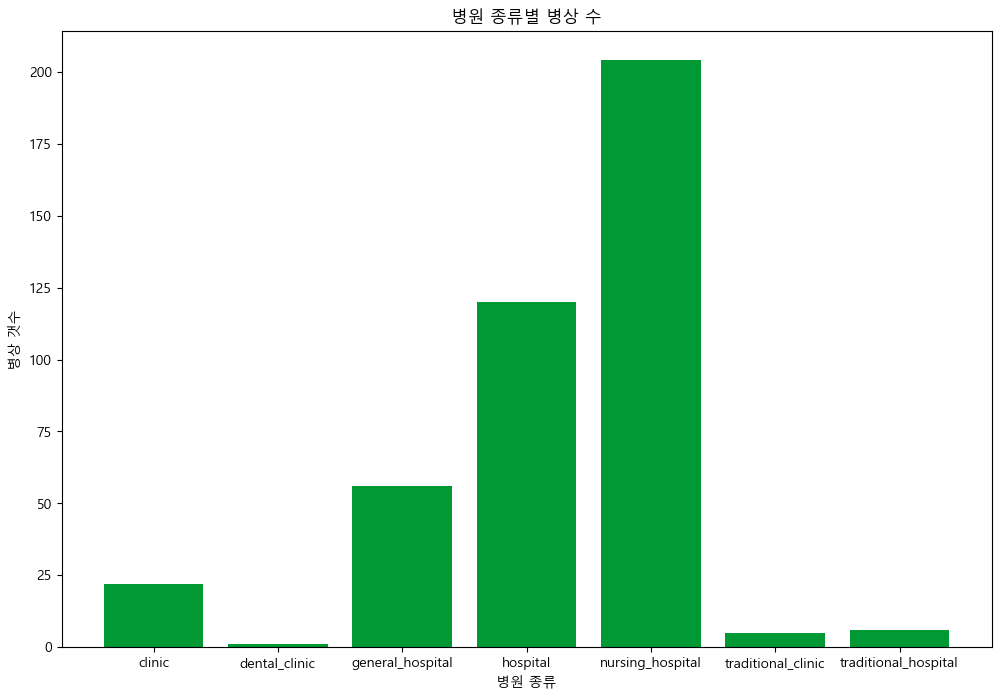

In [111]:
plt.rcParams['font.family'] = 'Malgun Gothic'
matplotlib.rcParams['axes.unicode_minus'] = False
plt.figure(figsize=(12,8))
    
plt.bar(x=df_bed.index, height=df_bed, color="#009933")
plt.title("Î≥ëÏõê Ï¢ÖÎ•òÎ≥Ñ Î≥ëÏÉÅ Ïàò")
plt.xlabel("Î≥ëÏõê Ï¢ÖÎ•ò")
plt.ylabel("Î≥ëÏÉÅ Í∞ØÏàò")
plt.show()

In [112]:
# Í∞úÏóÖÌïú ÎÇ†ÏßúÎäî Î≥ÄÏàòÎ°úÏÑú ÏùòÎØ∏Í∞Ä ÏóÜÏùå. Î™®Îç∏ÏùÄ ÎÇ†ÏßúÎ•º Ïù∏ÏãùÌïòÏßÄ Î™ªÌïòÍ∏∞ ÎïåÎ¨∏Ïóê
# Í∞úÏóÖ ÎÇ†ÏßúÏôÄ ÌèêÏóÖ ÎÇ†ÏßúÏùò Ï∞®Ïù¥Î°ú Î≥ÄÏàòÎ•º Ï°∞Ï†ïÌï† ÌïÑÏöîÍ∞Ä ÏûàÏùå

date_of_2018 = "2018-01-01"

# Î¨∏Ïûê ÌÉÄÏûÖÏùÑ date ÌÉÄÏûÖÏúºÎ°ú

# df["openDate"] = df["openDate"].apply(lambda x : datetime.strptime(str(x), "%Y%m%d")) # ValueError: unconverted data remains: .0
df["openDate"] = pd.to_datetime(df["openDate"], format="%Y%m%d")

# ÎÇ†Ïßú Ï∞®Ïù¥Î•º ÏÉàÎ°úÏö¥ Ïª¨ÎüºÏúºÎ°ú ÏÉùÏÑ±, Îç∞Ïù¥ÌÑ∞ ÌîÑÎ†àÏûÑ Ï§ëÍ∞ÑÏóê ÏÇΩÏûÖ
df.insert(2, "dif_date", datetime.strptime(date_of_2018,"%Y-%m-%d")-df["openDate"])
df["dif_date"] = df["dif_date"].dt.days

df.drop(labels="openDate", axis=1, inplace=True)

df["dif_date"].tail()

122   5925.000
123   6060.000
124   6209.000
125   6178.000
126   7686.000
Name: dif_date, dtype: float64

In [113]:
df_clst = df[["inst_id","OC", "dif_date","bedCount","busiProfit1", "busiProfit2", "profit1", "surplus1", "profit2", "surplus2", 
                  "employee1", "employee2", "instkind", "sido"]]

df_clst.info()

<class 'pandas.core.frame.DataFrame'>
Index: 428 entries, 0 to 126
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   inst_id      428 non-null    int64  
 1   OC           301 non-null    float64
 2   dif_date     427 non-null    float64
 3   bedCount     415 non-null    float64
 4   busiProfit1  418 non-null    float64
 5   busiProfit2  418 non-null    float64
 6   profit1      418 non-null    float64
 7   surplus1     418 non-null    float64
 8   profit2      418 non-null    float64
 9   surplus2     418 non-null    float64
 10  employee1    410 non-null    float64
 11  employee2    400 non-null    float64
 12  instkind     425 non-null    object 
 13  sido         428 non-null    object 
dtypes: float64(11), int64(1), object(2)
memory usage: 50.2+ KB


In [114]:
# Î≥ëÏõêÏùò Ï¢ÖÎ•òÎ•º, get_dummiesÎ•º Ïù¥Ïö©Ìï¥ one-hot-encoding
df = pd.get_dummies(df, columns=["instkind"], prefix=["instkind"], prefix_sep="_", dtype=int)
df_clst = pd.get_dummies(df_clst, columns=["instkind"], prefix=["instkind"], prefix_sep="_", dtype=int)

In [115]:
# ÏòÅÏñ¥Î°ú Îèº ÏûàÎäî 'ÏãúÎèÑ'Î•º ÌïúÍ∏ÄÎ°ú Î≥ÄÌôò

df["sido"].replace(['choongnam', 'gyeongnam', 'gyeonggi', 'incheon', 'busan',
       'jeonnam', 'seoul', 'jeonbuk', 'choongbuk', 'ulsan', 'daejeon',
       'daegu', 'gyeongbuk', 'gangwon', 'gwangju', 'sejong'], 
       ["Ï∂©Ï≤≠ÎÇ®ÎèÑ", "Í≤ΩÏÉÅÎÇ®ÎèÑ", "Í≤ΩÍ∏∞ÎèÑ", "Ïù∏Ï≤úÍ¥ëÏó≠Ïãú", 'Î∂ÄÏÇ∞Í¥ëÏó≠Ïãú', 'Ï†ÑÎùºÎÇ®ÎèÑ', 'ÏÑúÏö∏ÌäπÎ≥ÑÏãú', 
        'Ï†ÑÎùºÎ∂ÅÎèÑ', 'Ï∂©Ï≤≠Î∂ÅÎèÑ', 'Ïö∏ÏÇ∞Í¥ëÏó≠Ïãú', 'ÎåÄÏ†ÑÍ¥ëÏó≠Ïãú', 'ÎåÄÍµ¨Í¥ëÏó≠Ïãú', "Í≤ΩÏÉÅÎ∂ÅÎèÑ", "Í∞ïÏõêÎèÑ", "Í¥ëÏ£ºÍ¥ëÏó≠Ïãú", "ÏÑ∏Ï¢ÖÌäπÎ≥ÑÏûêÏπòÏãú"],inplace=True)

df_clst["sido"].replace(['choongnam', 'gyeongnam', 'gyeonggi', 'incheon', 'busan',
       'jeonnam', 'seoul', 'jeonbuk', 'choongbuk', 'ulsan', 'daejeon',
       'daegu', 'gyeongbuk', 'gangwon', 'gwangju', 'sejong'], 
       ["Ï∂©Ï≤≠ÎÇ®ÎèÑ", "Í≤ΩÏÉÅÎÇ®ÎèÑ", "Í≤ΩÍ∏∞ÎèÑ", "Ïù∏Ï≤úÍ¥ëÏó≠Ïãú", 'Î∂ÄÏÇ∞Í¥ëÏó≠Ïãú', 'Ï†ÑÎùºÎÇ®ÎèÑ', 'ÏÑúÏö∏ÌäπÎ≥ÑÏãú', 
        'Ï†ÑÎùºÎ∂ÅÎèÑ', 'Ï∂©Ï≤≠Î∂ÅÎèÑ', 'Ïö∏ÏÇ∞Í¥ëÏó≠Ïãú', 'ÎåÄÏ†ÑÍ¥ëÏó≠Ïãú', 'ÎåÄÍµ¨Í¥ëÏó≠Ïãú', "Í≤ΩÏÉÅÎ∂ÅÎèÑ", "Í∞ïÏõêÎèÑ", "Í¥ëÏ£ºÍ¥ëÏó≠Ïãú", "ÏÑ∏Ï¢ÖÌäπÎ≥ÑÏûêÏπòÏãú"],inplace=True)

print("dfÏùò ÏãúÎèÑ : ",df["sido"].unique())
print("df_clstÏùò ÏãúÎèÑ : ",df_clst["sido"].unique())

dfÏùò ÏãúÎèÑ :  ['Ï∂©Ï≤≠ÎÇ®ÎèÑ' 'Í≤ΩÏÉÅÎÇ®ÎèÑ' 'Í≤ΩÍ∏∞ÎèÑ' 'Ïù∏Ï≤úÍ¥ëÏó≠Ïãú' 'Î∂ÄÏÇ∞Í¥ëÏó≠Ïãú' 'Ï†ÑÎùºÎÇ®ÎèÑ' 'ÏÑúÏö∏ÌäπÎ≥ÑÏãú' 'Ï†ÑÎùºÎ∂ÅÎèÑ' 'Ï∂©Ï≤≠Î∂ÅÎèÑ' 'Ïö∏ÏÇ∞Í¥ëÏó≠Ïãú'
 'ÎåÄÏ†ÑÍ¥ëÏó≠Ïãú' 'ÎåÄÍµ¨Í¥ëÏó≠Ïãú' 'Í≤ΩÏÉÅÎ∂ÅÎèÑ' 'Í∞ïÏõêÎèÑ' 'Í¥ëÏ£ºÍ¥ëÏó≠Ïãú' 'ÏÑ∏Ï¢ÖÌäπÎ≥ÑÏûêÏπòÏãú' 'jeju']
df_clstÏùò ÏãúÎèÑ :  ['Ï∂©Ï≤≠ÎÇ®ÎèÑ' 'Í≤ΩÏÉÅÎÇ®ÎèÑ' 'Í≤ΩÍ∏∞ÎèÑ' 'Ïù∏Ï≤úÍ¥ëÏó≠Ïãú' 'Î∂ÄÏÇ∞Í¥ëÏó≠Ïãú' 'Ï†ÑÎùºÎÇ®ÎèÑ' 'ÏÑúÏö∏ÌäπÎ≥ÑÏãú' 'Ï†ÑÎùºÎ∂ÅÎèÑ' 'Ï∂©Ï≤≠Î∂ÅÎèÑ' 'Ïö∏ÏÇ∞Í¥ëÏó≠Ïãú'
 'ÎåÄÏ†ÑÍ¥ëÏó≠Ïãú' 'ÎåÄÍµ¨Í¥ëÏó≠Ïãú' 'Í≤ΩÏÉÅÎ∂ÅÎèÑ' 'Í∞ïÏõêÎèÑ' 'Í¥ëÏ£ºÍ¥ëÏó≠Ïãú' 'ÏÑ∏Ï¢ÖÌäπÎ≥ÑÏûêÏπòÏãú' 'jeju']


## Ïã¨ÌôîÏ†ÑÏ≤òÎ¶¨

In [116]:
# 2017ÎÖÑ ÏßÄÏó≠Î≥Ñ Ïù∏Íµ¨Ïàò Îç∞Ïù¥ÌÑ∞
# https://kosis.kr/statHtml/statHtml.do?orgId=101&tblId=DT_1B040A3
pop = pd.read_csv(dirShare+"/data/ÌñâÏ†ïÍµ¨Ïó≠_ÏãúÍµ∞Íµ¨_Î≥Ñ__ÏÑ±Î≥Ñ_Ïù∏Íµ¨Ïàò_20230718231833.csv", header=1, encoding="cp949")
pop.info()
pop.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18 entries, 0 to 17
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   ÌñâÏ†ïÍµ¨Ïó≠(ÏãúÍµ∞Íµ¨)Î≥Ñ  18 non-null     object
 1   Ï¥ùÏù∏Íµ¨Ïàò (Î™Ö)    18 non-null     int64 
 2   ÎÇ®ÏûêÏù∏Íµ¨Ïàò (Î™Ö)   18 non-null     int64 
 3   Ïó¨ÏûêÏù∏Íµ¨Ïàò (Î™Ö)   18 non-null     int64 
dtypes: int64(3), object(1)
memory usage: 708.0+ bytes


ÌñâÏ†ïÍµ¨Ïó≠(ÏãúÍµ∞Íµ¨)Î≥Ñ  Ï¥ùÏù∏Íµ¨Ïàò (Î™Ö)  ÎÇ®ÏûêÏù∏Íµ¨Ïàò (Î™Ö)  Ïó¨ÏûêÏù∏Íµ¨Ïàò (Î™Ö)
0         Ï†ÑÍµ≠  51778544   25855919   25922625
1      ÏÑúÏö∏ÌäπÎ≥ÑÏãú   9857426    4830206    5027220
2      Î∂ÄÏÇ∞Í¥ëÏó≠Ïãú   3470653    1709508    1761145
3      ÎåÄÍµ¨Í¥ëÏó≠Ïãú   2475231    1227814    1247417
4      Ïù∏Ï≤úÍ¥ëÏó≠Ïãú   2948542    1479597    1468945

In [117]:
# dfÏôÄ pop(Ïù∏Íµ¨Ïàò) join
df_new = pd.merge(df, pop, how="inner", left_on="sido", right_on="ÌñâÏ†ïÍµ¨Ïó≠(ÏãúÍµ∞Íµ¨)Î≥Ñ")
df_clst = pd.merge(df_clst, pop, how="inner", left_on="sido", right_on="ÌñâÏ†ïÍµ¨Ïó≠(ÏãúÍµ∞Íµ¨)Î≥Ñ")
print(df_new.head())
print("-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-")
print(df_clst.head())

   inst_id    OC  dif_date  sido  sgg  bedCount        revenue1  \
0        1 1.000  3657.000  Ï∂©Ï≤≠ÎÇ®ÎèÑ   73   175.000  4217530010.000   
1       59 1.000  1385.000  Ï∂©Ï≤≠ÎÇ®ÎèÑ   94   258.000  8546126935.000   
2      101 1.000 13026.000  Ï∂©Ï≤≠ÎÇ®ÎèÑ   37   341.000 52626386641.000   
3      134 1.000 10804.000  Ï∂©Ï≤≠ÎÇ®ÎèÑ   78    64.000  4402779495.000   
4      150 1.000  1589.000  Ï∂©Ï≤≠ÎÇ®ÎèÑ   94   186.000  5237992090.000   

       salescost1            sga1         salary1  ...  \
0           0.000  3961134739.000  2033835290.000  ...   
1           0.000  6737509250.000  3830658980.000  ...   
2 19326736791.000 32214235859.000 20975361934.000  ...   
3   719458530.000  4131517858.000  2436024468.000  ...   
4           0.000  5060655115.000  2623322811.000  ...   

   instkind_dental_clinic  instkind_general_hospital  instkind_hospital  \
0                       0                          0                  0   
1                       0                          0      

In [118]:
# ÏãúÎèÑÎ•º one-hot-encoding
df_new = pd.get_dummies(df_new, columns=["sido"], prefix=["sido"], prefix_sep="_", dtype=int)
df_clst = pd.get_dummies(df_clst, columns=["sido"], prefix=["sido"], prefix_sep="_", dtype=int)
df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 425 entries, 0 to 424
Data columns (total 85 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   inst_id                        425 non-null    int64  
 1   OC                             301 non-null    float64
 2   dif_date                       424 non-null    float64
 3   sgg                            425 non-null    int64  
 4   bedCount                       413 non-null    float64
 5   revenue1                       415 non-null    float64
 6   salescost1                     415 non-null    float64
 7   sga1                           415 non-null    float64
 8   salary1                        415 non-null    float64
 9   busiProfit1                    415 non-null    float64
 10  noi1                           415 non-null    float64
 11  noe1                           415 non-null    float64
 12  interest1                      415 non-null    flo

In [119]:
# Î≥ëÏõê Íµ∞ÏßëÏùÑ ÌÜµÌï¥ Í≤∞Ï∏°Ïπò ÏòàÏ∏°ÏùÑ ÌïòÍ≥†Ïûê Ìï®, surplus1 / 2, profit1 / 2, employee 1 / 2
df_new.drop(columns="ÌñâÏ†ïÍµ¨Ïó≠(ÏãúÍµ∞Íµ¨)Î≥Ñ", axis=1, inplace=True)
df_clst.drop(columns="ÌñâÏ†ïÍµ¨Ïó≠(ÏãúÍµ∞Íµ¨)Î≥Ñ", axis=1, inplace=True)

df_clst.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 425 entries, 0 to 424
Data columns (total 38 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   inst_id                        425 non-null    int64  
 1   OC                             301 non-null    float64
 2   dif_date                       424 non-null    float64
 3   bedCount                       413 non-null    float64
 4   busiProfit1                    415 non-null    float64
 5   busiProfit2                    415 non-null    float64
 6   profit1                        415 non-null    float64
 7   surplus1                       415 non-null    float64
 8   profit2                        415 non-null    float64
 9   surplus2                       415 non-null    float64
 10  employee1                      407 non-null    float64
 11  employee2                      397 non-null    float64
 12  instkind_clinic                425 non-null    int

In [120]:
# NaN Í∞íÏù¥ ÏóÜÎäî Ïª¨ÎüºÎßå ÎÇ®Í∏∞Í≥†, ÏßÄÏó≠ Îç∞Ïù¥ÌÑ∞ ÏóÜÏï†Í∏∞
df_kmeans = df_clst.dropna(axis=1, how="any")
df_kmeans = df_kmeans.iloc[:, :11]
df_kmeans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 425 entries, 0 to 424
Data columns (total 11 columns):
 #   Column                         Non-Null Count  Dtype
---  ------                         --------------  -----
 0   inst_id                        425 non-null    int64
 1   instkind_clinic                425 non-null    int32
 2   instkind_dental_clinic         425 non-null    int32
 3   instkind_general_hospital      425 non-null    int32
 4   instkind_hospital              425 non-null    int32
 5   instkind_nursing_hospital      425 non-null    int32
 6   instkind_traditional_clinic    425 non-null    int32
 7   instkind_traditional_hospital  425 non-null    int32
 8   Ï¥ùÏù∏Íµ¨Ïàò (Î™Ö)                       425 non-null    int64
 9   ÎÇ®ÏûêÏù∏Íµ¨Ïàò (Î™Ö)                      425 non-null    int64
 10  Ïó¨ÏûêÏù∏Íµ¨Ïàò (Î™Ö)                      425 non-null    int64
dtypes: int32(7), int64(4)
memory usage: 25.0 KB


## kmeansÎ•º ÌÜµÌïú Î≥ëÏõê ÏÑ∏Í∑∏Î®ºÌä∏ Íµ∞Ïßë

In [ ]:
def visualize_silhouette(cluster_lists, X_features): 

    import matplotlib.cm as cm
    import math

    # ÏûÖÎ†•Í∞íÏúºÎ°ú ÌÅ¥Îü¨Ïä§ÌÑ∞ÎßÅ Í∞ØÏàòÎì§ÏùÑ Î¶¨Ïä§Ìä∏Î°ú Î∞õÏïÑÏÑú, Í∞Å Í∞ØÏàòÎ≥ÑÎ°ú ÌÅ¥Îü¨Ïä§ÌÑ∞ÎßÅÏùÑ Ï†ÅÏö©ÌïòÍ≥† Ïã§Î£®Ïó£ Í∞úÏàòÎ•º Íµ¨Ìï®
    n_cols = len(cluster_lists)

    # plt.subplots()ÏúºÎ°ú Î¶¨Ïä§Ìä∏Ïóê Í∏∞Ïû¨Îêú ÌÅ¥Îü¨Ïä§ÌÑ∞ÎßÅ ÏàòÎßåÌÅºÏùò sub figuresÎ•º Í∞ÄÏßÄÎäî axs ÏÉùÏÑ± 
    fig, axs = plt.subplots(figsize=(4*n_cols, 4), nrows=1, ncols=n_cols)

    # Î¶¨Ïä§Ìä∏Ïóê Í∏∞Ïû¨Îêú ÌÅ¥Îü¨Ïä§ÌÑ∞ÎßÅ Í∞ØÏàòÎì§ÏùÑ Ï∞®Î°ÄÎ°ú iteration ÏàòÌñâÌïòÎ©¥ÏÑú Ïã§Î£®Ïó£ Í∞úÏàò ÏãúÍ∞ÅÌôî
    for ind, n_cluster in enumerate(cluster_lists):

        # KMeans ÌÅ¥Îü¨Ïä§ÌÑ∞ÎßÅ ÏàòÌñâÌïòÍ≥†, Ïã§Î£®Ïó£ Ïä§ÏΩîÏñ¥ÏôÄ Í∞úÎ≥Ñ Îç∞Ïù¥ÌÑ∞Ïùò Ïã§Î£®Ïó£ Í∞í Í≥ÑÏÇ∞. 
        clusterer = KMeans(n_clusters = n_cluster, max_iter=500, random_state=0)
        cluster_labels = clusterer.fit_predict(X_features)

        sil_avg = silhouette_score(X_features, cluster_labels)
        sil_values = silhouette_samples(X_features, cluster_labels)

        y_lower = 10
        axs[ind].set_title('Number of Cluster : '+ str(n_cluster)+'\n' \
                          'Silhouette Score :' + str(round(sil_avg,3)) )
        axs[ind].set_xlabel("The silhouette coefficient values")
        axs[ind].set_ylabel("Cluster label")
        axs[ind].set_xlim([-0.1, 1])
        axs[ind].set_ylim([0, len(X_features) + (n_cluster + 1) * 10])
        axs[ind].set_yticks([])  # Clear the yaxis labels / ticks
        axs[ind].set_xticks([0, 0.2, 0.4, 0.6, 0.8, 1])

        # ÌÅ¥Îü¨Ïä§ÌÑ∞ÎßÅ Í∞ØÏàòÎ≥ÑÎ°ú fill_betweenx( )ÌòïÌÉúÏùò ÎßâÎåÄ Í∑∏ÎûòÌîÑ ÌëúÌòÑ. 
        for i in range(n_cluster):
            ith_cluster_sil_values = sil_values[cluster_labels==i]
            ith_cluster_sil_values.sort()

            size_cluster_i = ith_cluster_sil_values.shape[0]
            y_upper = y_lower + size_cluster_i

            color = cm.nipy_spectral(float(i) / n_cluster)
            axs[ind].fill_betweenx(np.arange(y_lower, y_upper), 0, ith_cluster_sil_values, \
                                facecolor=color, edgecolor=color, alpha=0.7)
            axs[ind].text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
            y_lower = y_upper + 10

        axs[ind].axvline(x=sil_avg, color="red", linestyle="--")

In [ ]:
scaler1 = MinMaxScaler()

df_mmsc = df_kmeans.drop(columns=["inst_id"])

scalerX1 = scaler1.fit(df_mmsc)

X_mmsc1 = scaler1.transform(df_mmsc)

In [ ]:
visualize_silhouette([2,3,4,5,7,9,10,12,15], X_mmsc1)
# 12Í∞úÍ∞Ä ÎêêÏùÑ Îïå Ïã§Î£®Ïó£ Í≥ÑÏàòÍ∞Ä 0.889ÏúºÎ°ú ÏµúÎåÄ

In [ ]:
clst_kmeans = KMeans(n_clusters=12, random_state=0, max_iter=500)

model = clst_kmeans.fit(X_mmsc1)
clst_label = model.labels_

print(clst_label)

In [ ]:
df_kmeans["NumberOfCluster"] = pd.Series(clst_label)
df_kmeans.tail()

In [ ]:
# df_kmeans.head()

In [ ]:
df_kmeans.groupby(by="NumberOfCluster", axis=0)["inst_id"].count()

In [ ]:
# Ïû¨Î¨¥ Ï†ïÎ≥¥Í∞Ä Ìè¨Ìï®Îèº ÏûàÎäî Îç∞Ïù¥ÌÑ∞ ÌîÑÎ†àÏûÑÏóê ÌÅ¥Îü¨Ïä§ÌÑ∞ÎßÅ ÎÑòÎ≤Ñ ÏÇΩÏûÖ
df_join_clst = pd.merge(df_clst, df_kmeans[["inst_id", "NumberOfCluster"]], how="left", left_on="inst_id", right_on="inst_id")
df_join_clst.info()

In [ ]:
df_join_clst[df_join_clst.isna().any(axis=1)]

In [ ]:
# df_join_clst[df_join_clst.notnull().all(axis=1)].groupby("NumberOfCluster", axis=0).max()
df_join_clst.groupby("NumberOfCluster", axis=0).min()


In [ ]:
df_clst_median = df_join_clst.groupby("NumberOfCluster", axis=0).median()
df_clst_median

In [ ]:
# Íµ∞ÏßëÎ≥Ñ ÌûàÏä§ÌÜ†Í∑∏Îû® ÌôïÏù∏

def sp_hist(DF=None, colClst=None, colhist=None, Range=None) :
    """
    Íµ∞ÏßëÎ≥Ñ ÌäπÏ†ï Ïª¨ÎüºÏùò ÌûàÏä§ÌÜ†Í∑∏Îû®ÏùÑ ÌôïÏù∏Ìï©ÎãàÎã§.

    DF : ÌûàÏä§ÌÜ†Í∑∏Îû®ÏùÑ ÌôïÏù∏ÌïòÍ≥†Ïûê ÌïòÎäî Îç∞Ïù¥ÌÑ∞ÌîÑÎ†àÏûÑ
    colClst : Íµ∞Ïßë Î≤àÌò∏Î•º ÌëúÏãúÌïòÎäî Ïª¨Îüº
    colhist : ÌûàÏä§ÌÜ†Í∑∏Îû®ÏúºÎ°ú ÌëúÌòÑÌïòÍ≥†Ïûê ÌïòÎäî Ïª¨Îüº
    """
    
    fig, axs = plt.subplots(figsize=(16, 32), nrows=4, ncols=3)
    # axsÎäî numpy ndarray ÌòïÏãù

    # ÌïúÍ∏Ä Ìè∞Ìä∏ ÏÑ§Ï†ï Î∞è Íπ®Ïßê Î∞©ÏßÄ
    plt.rcParams['font.family'] = 'Malgun Gothic'
    matplotlib.rcParams['axes.unicode_minus'] = False
    
    for c in range(Range):
        dataframe = DF[DF[colClst]==c][colhist]
        # print("ÌòÑÏû¨ ÏàúÏÑú :",c)
        # print("Ìñâ :", c//3)
        # print("Ïó¥ :", c%3)
        axs[(c//3),(c % 3)].hist(dataframe, bins=20)
        axs[(c//3),(c % 3)].set_title('Number of Cluster : '+ str(c)+'\n' \
                            'Column Name :' + str(dataframe.name) )
        axs[(c//3),(c % 3)].set_xlabel("Í≥ÑÍ∏â")
        axs[(c//3),(c % 3)].set_ylabel("ÎèÑÏàò")

    plt.show()

    return

In [ ]:
# Íµ∞ÏßëÎ≥Ñ boxplot ÌôïÏù∏
def sp_boxplot(DF=None, colClst=None, colbox=None, Range=None) :
    plt.figure(figsize=(28,20))
    plt.rcParams['font.family'] = 'Malgun Gothic'
    matplotlib.rcParams['axes.unicode_minus'] = False

    # rectangular box plot
    DF_box = pd.DataFrame()

    for c in range(Range) : 
        dataframe = DF[DF[colClst]==c][colbox]
        dataframe.rename(str(c), inplace=True)
        DF_box = pd.concat([DF_box, dataframe], axis=1)

    sns.boxplot(
                data = DF_box,
                orient='v'
                ) 
    plt.title("ÌÅ¥Îü¨Ïä§ÌÑ∞ Î≥Ñ boxplot")

    plt.show()
    return

In [ ]:
# 17ÎÖÑÎèÑ ÎãπÍ∏∞ÏàúÏù¥Ïùµ ÌûàÏä§ÌÜ†Í∑∏Îû®
# sp_hist(DF=df_join_clst, colClst="NumberOfCluster", colhist="profit1", Range=12)

In [ ]:
# 17ÎÖÑÎèÑ ÎãπÍ∏∞ÏàúÏù¥Ïùµ Î∞ïÏä§ÌîåÎ°Ø
# sp_boxplot(DF=df_join_clst, colClst="NumberOfCluster", colbox="profit1", Range=12)

In [ ]:
# test_df[test_df["1"].notnull()]

In [ ]:
# 16ÎÖÑÎèÑ ÎãπÍ∏∞ÏàúÏù¥Ïùµ
# sp_hist(DF=df_join_clst, colClst="NumberOfCluster", colhist="profit2")

In [ ]:
# 17ÎÖÑÎèÑ Ïù¥Ïùµ ÏûâÏó¨Í∏à
# sp_hist(DF=df_join_clst, colClst="NumberOfCluster", colhist="surplus1")

In [ ]:
# 16ÎÖÑÎèÑ Ïù¥Ïùµ ÏûâÏó¨Í∏à
# sp_hist(DF=df_join_clst, colClst="NumberOfCluster", colhist="surplus2")

In [ ]:
# 17ÎÖÑÎèÑ ÏßÅÏõêÏàò
# sp_hist(DF=df_join_clst, colClst="NumberOfCluster", colhist="employee1")

In [ ]:
# 16ÎÖÑÎèÑ ÏßÅÏõêÏàò
# sp_hist(DF=df_join_clst, colClst="NumberOfCluster", colhist="employee2")

- ÎãπÍ∏∞ÏàúÏù¥Ïùµ : Ï§ëÏïôÍ∞í
- Ïù¥ÏùµÏûâÏó¨Í∏à : Ï§ëÏïôÍ∞í
- ÏßÅÏõê Ïàò : 16ÎÖÑÎèÑÏôÄ 17ÎÖÑÎèÑÏùò ÌèâÍ∑†?, Ï§ëÏïôÍ∞í

In [ ]:
# Íµ∞ÏßëÎ≥Ñ Ï§ëÏïôÍ∞íÏúºÎ°ú Í≤∞Ï∏°Ïπò Ï±ÑÏõÄ

def fill_median(DF=None, colClst=None, colFill=None, numclst=None) :
    """
    Í≤∞Ï∏°ÏπòÍ∞Ä ÏûàÎäî Ìñâ Îç∞Ïù¥ÌÑ∞Ïóê, Íµ∞ÏßëÎ≥Ñ Ï§ëÏïôÍ∞íÏùÑ Ï±ÑÏõå ÎÑ£Í≥†Ïûê Ìï®

    DF : ÌûàÏä§ÌÜ†Í∑∏Îû®ÏùÑ ÌôïÏù∏ÌïòÍ≥†Ïûê ÌïòÎäî Îç∞Ïù¥ÌÑ∞ÌîÑÎ†àÏûÑ
    colClst : Íµ∞Ïßë Î≤àÌò∏Î•º ÌëúÏãúÌïòÎäî Ïª¨Îüº(str)
    colFill : Í≤∞Ï∏°ÏπòÎ•º Ï±ÑÏö∞Í≥†Ïûê ÌïòÎäî Ïª¨Îüº Î¶¨Ïä§Ìä∏(list)
    numclst : ÌÅ¥Îü¨Ïä§ÌÑ∞ Í∞úÏàò(int)
    """
    for cl in range(numclst) :
        for L in colFill :
            median_value = DF.loc[DF[colClst] == cl, L].median()
            DF.loc[(DF[colClst] == cl) & DF[L].isnull(), L] = median_value

    return DF

In [ ]:
df_join_clst = fill_median(DF=df_join_clst, colClst="NumberOfCluster", 
                           colFill=["dif_date", "bedCount","busiProfit1","busiProfit2","profit1", \
                                    "profit2", "surplus1", "surplus2", "employee1", "employee2"], numclst=12)
df_join_clst.info()

## SVDÎ•º ÏúÑÌïú ÏûëÏóÖ

Îç∞Ïù¥ÌÑ∞Ïùò ÏñëÏùÄ ÎèÖÎ¶ΩÎ≥ÄÏàò ÏàòÏùò 3Î∞∞ Ïù¥ÏÉÅÏùÄ ÎèºÏïº Ìï®.
ÎèÖÎ¶ΩÎ≥ÄÏàòÎ°ú ÏûëÏö©ÌïòÎäî Ïª¨Îüº ÏàòÍ∞Ä 57Í∞úÏù¥ÎØÄÎ°ú Îã§Ï§ë Í≥µÏÑ†ÏÑ±Í≥º Í≥ºÏ†ÅÌï©, Ï∞®ÏõêÏùò Ï†ÄÏ£ºÏùò ÏòÅÌñ•Ïù¥ ÏòàÏÉÅÎêòÎØÄÎ°ú
Ï∞®Ïõê Ï∂ïÏÜå ÌïÑÏöî

In [ ]:
# Í≤∞Ï∏°ÏπòÍ∞Ä ÏûàÎäî Ïª¨Îüº Ï∂îÏ∂ú
df_null = df_clst[df_clst.isna().any(axis=1)]
df_null.head(10)

In [ ]:
# Î≥ëÏõê Ï†ïÎ≥¥Ïóê NULLÏù¥ Ï°¥Ïû¨ÌïòÎäî Î∂ÄÎ∂ÑÏùÑ Îã§Î•∏ Í∞íÏúºÎ°ú ÎåÄÏ≤¥Ìï† Ïàò ÏóÜÏùå
# Î≥ëÏõêÏùò Îß§Ï∂ú, ÎπÑÏö©, Ïù¥Ïùµ, ÏßÅÏõê ÏàòÏôÄ Í∞ôÏùÄ Í∞íÏùÑ Îã§Î•∏ Î≥ëÏõêÏùò ÌèâÍ∑†Ïù¥ÎÇò Ï§ëÏïôÍ∞íÏúºÎ°ú ÎåÄÏ≤¥ÌïòÎ©¥ Ïïà Îê®
# ÌöåÍ∑ÄÎåÄÏ≤¥Î≤ïÏùÑ ÌïòÍ∏∞ÏóêÎäî Ï¢ÖÏÜç Î≥ÄÏàòÎ°ú Îëò ÎßåÌïú ÏÜçÏÑ±Í∞íÏù¥ Ï°¥Ïû¨ X
# nullÏù¥ Ìè¨Ìï®Îêú Îç∞Ïù¥ÌÑ∞Í∞Ä Ï†ÑÏ≤¥ Îç∞Ïù¥ÌÑ∞Ïùò 10% ÎØ∏ÎßåÏù¥ÎØÄÎ°ú 

df.dropna(axis=0, how="any", inplace=True)
df.shape[0]

In [ ]:
# Îç∞Ïù¥ÌÑ∞ Í∞íÏù¥ 0ÏúºÎ°úÎßå Îèº ÏûàÎäî Ïª¨Îüº ÏÇ≠Ï†ú
df.drop(columns=["receivableL1", "receivableL2"], axis=1, inplace=True)
# ÏãúÍµ∞Íµ¨ ÏΩîÎìú ÏÇ≠Ï†ú
df.drop(columns="sgg", axis=1, inplace=True)
# Î≥ëÏõê idÎäî Î∂ÑÏÑùÏóê ÏûàÏñ¥ÏÑú ÏùòÎØ∏Í∞Ä ÏóÜÎäî Îç∞Ïù¥ÌÑ∞Ïù¥ÎØÄÎ°ú ÏÇ≠Ï†ú
df.drop(columns="inst_id",inplace=True)
# Îç∞Ïù¥ÌÑ∞ ÌîÑÎ†àÏûÑÏóêÏÑú drop ÎêêÎäîÏßÄ ÌôïÏù∏
# df.columns

In [ ]:
df_drop_obj = copy.deepcopy(df)  # ÍπäÏùÄ Î≥µÏÇ¨
df_dr_obj_cols = df_drop_obj.columns.to_list()
# df_dr_obj_cols

ü´°ÏãúÎèÑÏΩîÎìúÏôÄ ÏãúÍµ∞Íµ¨ ÏΩîÎìúÎ•º ÌïôÏäµÏãúÌÇ¨ ÏàòÎèÑ ÏûàÏäµÎãàÎã§.  
One-Hot EncodingÏùÑ Ïù¥Ïö©ÌïòÎ©¥ ÎêòÏ£†.  
ÌïòÏßÄÎßå Ïû¨Î¨¥ Ï†ïÎ≥¥ÏôÄ Í¥ÄÎ†®Îêú ÌòÑ Îç∞Ïù¥ÌÑ∞ÏóêÏÑúÎäî ÏùòÎØ∏Í∞Ä ÏóÜÏùÑ Í≤É Í∞ôÏäµÎãàÎã§.  
Í∑∏ Ïù¥Ïú†Îäî ÏßÄÏó≠Ïùò Ïù¥Î¶Ñ ÏûêÏ≤¥Í∞Ä, Î≥ÄÏàòÎ°úÏÑú ÌÅ∞ ÏòÅÌñ•Î†•ÏùÑ Í∞ÄÏßÄÏßÄÎäî ÏïäÏùÑ Í≤É Í∞ôÍ±∞Îì†Ïöî!!  
ÏßÄÏó≠Ïù¥ Î≥ÄÏàòÎ°ú ÏòÅÌñ•ÏùÑ Í∞ÄÏßÄÎ†§Î©¥, Í∑∏ ÏßÄÏó≠Ïùò Î©¥Ï†Å, Ïù∏Íµ¨Î∞ÄÎèÑ, ÌèâÍ∑† ÏÜåÎìùüí∏ Îì±ÏúºÎ°ú ÎåÄÏ≤¥Ìï¥Ïïº Ìï† Í≤É Í∞ôÏäµÎãàÎã§.  
ÏùºÎã® ÏßÄÍ∏àÏùÄ Ïû¨Î¨¥ Ï†ïÎ≥¥Ïóê ÎåÄÌïú Í≤ÉÏúºÎ°úÎßå ÏòàÏ∏°ÏùÑ Ìï¥Î≥¥Ï£†!  

In [ ]:
df_drop_obj2 = copy.deepcopy(df_drop_obj)

# Ïª¨Îüº Îç∞Ïù¥ÌÑ∞ ÌÉÄÏûÖÏù¥ 'object'Ïù∏ Ïª¨Îüº ÏÇ≠Ï†ú
for i in range(len(df_dr_obj_cols)) : 
    if df_drop_obj.iloc[:,i].dtype == "object" : 
        df_drop_obj2.drop(columns=df_dr_obj_cols[i], inplace=True)

df_drop_obj = df_drop_obj2
# df_drop_obj.info()

In [ ]:
# Í∞úÏóÖ ÎÇ†ÏßúÎ•º dropÌïú ÏÉàÎ°úÏö¥ Îç∞Ïù¥ÌÑ∞ÌîÑÎ†àÏûÑ ÏÉùÏÑ±
df_hos = df_drop_obj.drop(columns="openDate")

In [ ]:
# ÎèÖÎ¶ΩÎ≥ÄÏàò Ïª¨Îüº ÏÉ§ÌîºÎ°ú ÏúåÌÅ¨ Í≤ÄÏ†ïÏúºÎ°ú Ï†ïÍ∑úÏÑ± ÌôïÏù∏
# H0 : Î≥ÄÏàòÎäî Ï†ïÍ∑úÏÑ±ÏùÑ Îî∞Î•∏Îã§.
# H1 : Î≥ÄÏàòÎäî Ï†ïÍ∑úÏÑ±ÏùÑ Îî∞Î•¥ÏßÄ ÏïäÎäîÎã§.

cnt = 0

for i in range(df_hos.shape[1]) : 
    cnt += 1
    shapiro_tt = stats.shapiro(df_hos.iloc[:,i])
    print(cnt)
    if shapiro_tt[1] > 0.05 : 
        print("Ïª¨ÎüºÎ™Ö ",df_hos.columns[i],"Îäî(ÏùÄ) Í∑ÄÎ¨¥Í∞ÄÏÑ§ÏùÑ Ï±ÑÌÉù, Ï†ïÍ∑úÏÑ±ÏùÑ Îî∞Î•∏Îã§Í≥† Í∞ÄÏ†ïÌï† Ïàò ÏûàÏäµÎãàÎã§.")
    else : 
        print("Ïª¨ÎüºÎ™Ö ",df_hos.columns[i],"Îäî(ÏùÄ) Í∑ÄÎ¨¥Í∞ÄÏÑ§ÏùÑ Í∏∞Í∞Å, Ï†ïÍ∑úÏÑ±ÏùÑ Îî∞Î•∏Îã§Í≥† Í∞ÄÏ†ïÌï† Ïàò ÏóÜÏäµÎãàÎã§.")
    print("-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-")

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,5))    # Í∑∏ÎûòÌîÑ ÏÇ¨Ïù¥Ï¶à ÏßÄÏ†ï
stats.probplot(df_hos.iloc[:,7], dist=stats.norm, plot=plt) #SampleÏùÄ Ïñ¥Îäê Ï†ïÎèÑ Ïñ¥Í∏ãÎÇ¨ÎäîÏßÄ ÎπÑÍµêÌï† Î∂ÑÌè¨,
                                                  #distÎäî Í∏∞Ï§ÄÏù¥ ÎêòÎäî Î∂ÑÌè¨, Ï†ïÍ∑ú Î∂ÑÌè¨Í∞Ä ÏïÑÎãàÏñ¥ÎèÑ ÎêúÎã§.
                                                  #plotÏùÄ Ï£ºÎ°ú matplotlib.plt Í∞ùÏ≤¥ ÏÇ¨Ïö©
plt.show()

In [ ]:
scaler = MinMaxScaler()

scalerX = scaler.fit(df_hos.iloc[:,1:])

X_mmsc = scaler.transform(df_hos.iloc[:,1:])

# X_mmsc

In [ ]:
import numpy as np
from sklearn.decomposition import TruncatedSVD

# Ï∞®Ïõê Ï∂ïÏÜåÎ•º ÏúÑÌïú SVD ÏàòÌñâ
svd = TruncatedSVD(n_components=6)
make_svd = svd.fit(X_mmsc)
X_train_red = svd.transform(X_mmsc)

## statsmodelsÎ•º ÏÇ¨Ïö©Ìïú vif Í≥ÑÏÇ∞

In [122]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 425 entries, 0 to 424
Data columns (total 84 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   inst_id                        425 non-null    int64  
 1   OC                             301 non-null    float64
 2   dif_date                       424 non-null    float64
 3   sgg                            425 non-null    int64  
 4   bedCount                       413 non-null    float64
 5   revenue1                       415 non-null    float64
 6   salescost1                     415 non-null    float64
 7   sga1                           415 non-null    float64
 8   salary1                        415 non-null    float64
 9   busiProfit1                    415 non-null    float64
 10  noi1                           415 non-null    float64
 11  noe1                           415 non-null    float64
 12  interest1                      415 non-null    flo

In [ ]:
df_new["ÌñâÏ†ïÍµ¨Ïó≠(ÏãúÍµ∞Íµ¨)Î≥Ñ"]

In [ ]:
tttt = "+".join(df_new.columns[1:])
print(tttt)

In [121]:
# Î≥ëÏõê Í∞ú/ÌèêÏóÖ Ï†ïÎ≥¥Ïùò Îã§Ï§ë ÌöåÍ∑Ä Î∂ÑÏÑùÍ≥º Í≤ÄÏ†ï ÌÜµÍ≥ÑÎüâ ÌôïÏù∏
Models1 = sm.ols("OC ~ " + "+".join(df_new.columns[2:]), data=df_new.iloc[:,1:])
result1 = Models1.fit()
print(result1.summary())

PatsyError: Error evaluating factor: NameError: name 'ÎÇ®ÏûêÏù∏Íµ¨Ïàò' is not defined
    OC ~ dif_date+sgg+bedCount+revenue1+salescost1+sga1+salary1+busiProfit1+noi1+noe1+interest1+ctax1+profit1+liquidAsset1+quickAsset1+receivableS1+inventoryAsset1+nonCAsset1+tanAsset1+OnonCAsset1+receivableL1+debt1+liquidLiabilities1+shortLoan1+NCLiabilities1+longLoan1+netAsset1+surplus1+revenue2+salescost2+sga2+busiProfit2+salary2+noi2+noe2+interest2+ctax2+profit2+liquidAsset2+quickAsset2+receivableS2+inventoryAsset2+nonCAsset2+tanAsset2+OnonCAsset2+receivableL2+debt2+liquidLiabilities2+shortLoan2+NCLiabilities2+longLoan2+netAsset2+surplus2+employee1+employee2+ownerChange+instkind_clinic+instkind_dental_clinic+instkind_general_hospital+instkind_hospital+instkind_nursing_hospital+instkind_traditional_clinic+instkind_traditional_hospital+Ï¥ùÏù∏Íµ¨Ïàò (Î™Ö)+ÎÇ®ÏûêÏù∏Íµ¨Ïàò (Î™Ö)+Ïó¨ÏûêÏù∏Íµ¨Ïàò (Î™Ö)+sido_Í∞ïÏõêÎèÑ+sido_Í≤ΩÍ∏∞ÎèÑ+sido_Í≤ΩÏÉÅÎÇ®ÎèÑ+sido_Í≤ΩÏÉÅÎ∂ÅÎèÑ+sido_Í¥ëÏ£ºÍ¥ëÏó≠Ïãú+sido_ÎåÄÍµ¨Í¥ëÏó≠Ïãú+sido_ÎåÄÏ†ÑÍ¥ëÏó≠Ïãú+sido_Î∂ÄÏÇ∞Í¥ëÏó≠Ïãú+sido_ÏÑúÏö∏ÌäπÎ≥ÑÏãú+sido_ÏÑ∏Ï¢ÖÌäπÎ≥ÑÏûêÏπòÏãú+sido_Ïö∏ÏÇ∞Í¥ëÏó≠Ïãú+sido_Ïù∏Ï≤úÍ¥ëÏó≠Ïãú+sido_Ï†ÑÎùºÎÇ®ÎèÑ+sido_Ï†ÑÎùºÎ∂ÅÎèÑ+sido_Ï∂©Ï≤≠ÎÇ®ÎèÑ+sido_Ï∂©Ï≤≠Î∂ÅÎèÑ
                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                     ^^^^^^^^^

In [ ]:
# ÎèÖÎ¶ΩÎ≥ÄÏàò XÏôÄ Ï¢ÖÏÜçÎ≥ÄÏàò yÎ°ú Î∂ÑÎ¶¨
X = df_hos.iloc[:,1:]
y = df_hos.iloc[:,0]

In [ ]:
# ÎèÖÎ¶ΩÎ≥ÄÏàòÎì§Í∞Ñ Îã§Ï§ë Í≥µÏÑ†ÏÑ± ÌôïÏù∏, vif ÏßÄÏàò 10 Ïù¥ÏÉÅÏù¥Î©¥ Î≥ÄÏàò Ï†úÍ±∞ Í≥†Î†§
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X.values,i) for i in range(X.shape[1])]
vif["features"] = X.columns
vif = vif.sort_values("VIF Factor").reset_index(drop=True)
vif

In [ ]:
# vif ÏßÄÏàòÍ∞Ä 10ÎØ∏ÎßåÏù∏ Ïª¨ÎüºÎ™Ö
vif[vif["VIF Factor"]<10.0]["features"]

In [ ]:
feat_vif = vif[vif["VIF Factor"]<10.0]["features"]

fvList = [feat_vif[f] for f in range(len(feat_vif))]

In [ ]:
fvList.insert(0, "OC")

In [ ]:
df_drop_vif = df_hos[fvList]
# df_drop_vif.head()

In [ ]:
Models2 = sm.ols("OC ~ " + "+".join(df_drop_vif.columns[1:]), data=df_drop_vif)
result2 = Models2.fit()
print(result2.summary())

In [ ]:
"""
vif ÏßÄÏàòÍ∞Ä 10 Ïù¥ÏÉÅÏù¥ÎùºÍ≥† Î¨¥Ï°∞Í±¥ Ï†úÍ±∞ÌïòÎ©¥ Ïïà Îê®!
"""

# Î™®Îç∏ÌïôÏäµ

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=626, stratify=y)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

In [ ]:
model_xgb = XGBClassifier()
xgb_model = model_xgb.fit(X_train, y_train)

y_pred = xgb_model.predict(X_test)
y_pred_prob = xgb_model.predict_proba(X_test)[:1]

In [ ]:
X2 = df_drop_vif.iloc[:,1:]
y2 = df_drop_vif.iloc[:,0]

X_train2, X_test2, y_train2, y_test2= train_test_split(X2, y2, test_size=0.2, random_state=626, stratify=y2)
print(X_train2.shape)
print(X_test2.shape)
print(y_train2.shape)
print(y_test2.shape)

model_xgb2 = XGBClassifier()
xgb_model2 = model_xgb2.fit(X_train2, y_train2)

y_pred2 = xgb_model2.predict(X_test2)
y_pred_prob2 = xgb_model2.predict_proba(X_test2)[:1]

print("Ï†ïÌôïÎèÑ : ",accuracy_score(y_test2, y_pred2))
print("f1 socre : ",f1_score(y_test2, y_pred2))

In [ ]:
y_train_red = df_hos.iloc[:,0].to_numpy()

print(y_train_red)
print(y_train_red.shape)

In [ ]:
X_train3, X_test3, y_train3, y_test3= train_test_split(X_train_red, y_train_red, test_size=0.2, random_state=626, stratify=y_train_red)
print(X_train3.shape)
print(X_test3.shape)
print(y_train3.shape)
print(y_test3.shape)

model_xgb_svd = XGBClassifier()
xgb_model_svd = model_xgb_svd.fit(X_train3, y_train3)

y_pred3 = xgb_model_svd.predict(X_test3)

print("Ï†ïÌôïÎèÑ : ",accuracy_score(y_test3, y_pred3))
print("f1 socre : ",f1_score(y_test3, y_pred3))

# Î≥ëÏõê Ï†ïÎ≥¥ api Î∂àÎü¨Ïò§Í∏∞

In [ ]:
"""
https://apis.data.go.kr/B551182/hospInfoServicev2/getHospBasisList?serviceKey=repbMvjCXw96iTs6wjKM3Htm1H480VcdawruKmikMmOYZF8aVD%2FrJDkfGoyLeTuS5Y1KEOzUrwwPIu87UQ9LbQ%3D%3D&pageNo=1&numOfRows=10&sidoCd=110000&sgguCd=110019&emdongNm=%EC%8B%A0%EB%82%B4%EB%8F%99&yadmNm=%EC%84%9C%EC%9A%B8%EC%9D%98%EB%A3%8C%EC%9B%90&zipCd=2010&clCd=11&dgsbjtCd=01&xPos=127.09854004628151&yPos=37.6132113197367&radius=3000
"""

In [ ]:
serviceKey = "repbMvjCXw96iTs6wjKM3Htm1H480VcdawruKmikMmOYZF8aVD/rJDkfGoyLeTuS5Y1KEOzUrwwPIu87UQ9LbQ=="
serviceKeyDecoded = parse.unquote(serviceKey, 'UTF-8')

url = "http://apis.data.go.kr/B551182/hospInfoServicev2/getHospBasisList"
returnType="xml"
Pindex = 1
Psize = 1000


queryParams = '?' + parse.urlencode({ parse.quote_plus("serviceKey") : serviceKeyDecoded,
                                parse.quote_plus("numOfRows") : '10000',
                                parse.quote_plus("pageNo") : '2'
                                    })

res = requests.get(url + queryParams)

In [ ]:
soup = BeautifulSoup(res.text, 'lxml-xml')
items = soup.find_all("item")

In [ ]:
pprint.pprint(items)

In [ ]:
len(items)

In [ ]:
def parse():
    try:
        ADDR = item.find("addr").get_text()
        CLCD = item.find("clCd").get_text()
        CLCDNM = item.find("clCdNm").get_text()
        EMDONGNM = item.find("emdongNm").get_text()
        ESTBDB = item.find("estbDd").get_text()
        POSTNO = item.find("postNo").get_text()
        SGGUCD = item.find("sgguCd").get_text()
        SGGUCDNM = item.find("sgguCdNm").get_text()
        SIDOCD = item.find("sidoCd").get_text()
        SIDOCDNM = item.find("sidoCdNm").get_text()
        XPOS = item.find("XPos").get_text()
        YPOS = item.find("YPos").get_text()
        YADMNM = item.find("yadmNm").get_text()
        YKIHO = item.find("ykiho").get_text()
        return {
            "Ï£ºÏÜå":ADDR,
            "Ï¢ÖÎ≥ÑÏΩîÎìú":CLCD,
            "Ï¢ÖÎ≥ÑÏΩîÎìúÎ™Ö":CLCDNM,
            "ÏùçÎ©¥Îèô":EMDONGNM,
            "Í∞úÏÑ§ÏùºÏûê":ESTBDB,
            "Post No.":POSTNO,
            "ÏãúÍµ∞Íµ¨ÏΩîÎìú":SGGUCD,
            "ÏãúÍµ∞Íµ¨ÏΩîÎìúÎ™Ö":SGGUCDNM,
            "ÏãúÎèÑÏΩîÎìú":SIDOCD,
            "ÏãúÎèÑÏΩîÎìúÎ™Ö":SIDOCDNM,
            "xÏ¢åÌëú":XPOS,
            'yÏ¢åÌëú':YPOS,
            "ÏöîÏñëÍ∏∞Í¥ÄÎ™Ö":YADMNM,
            "ÏïîÌò∏ÌôîÏöîÏñëÍ∏∞Ìò∏":YKIHO
        }
    except AttributeError as e:
        return {
            "Ï£ºÏÜå":None,
            "Ï¢ÖÎ≥ÑÏΩîÎìú":None,
            "Ï¢ÖÎ≥ÑÏΩîÎìúÎ™Ö":None,
            "ÏùçÎ©¥Îèô":None,
            "Í∞úÏÑ§ÏùºÏûê":None,
            "Post No.":None,
            "ÏãúÍµ∞Íµ¨ÏΩîÎìú":None,
            "ÏãúÍµ∞Íµ¨ÏΩîÎìúÎ™Ö":None,
            "ÏãúÎèÑÏΩîÎìú":None,
            "ÏãúÎèÑÏΩîÎìúÎ™Ö":None,
            "xÏ¢åÌëú":None,
            'yÏ¢åÌëú':None,
            "ÏöîÏñëÍ∏∞Í¥ÄÎ™Ö":None,
            "ÏïîÌò∏ÌôîÏöîÏñëÍ∏∞Ìò∏":None
        }

In [ ]:
row = list()

for item in items : 
    row.append(parse())

In [ ]:
df_api = pd.DataFrame(row)
df_api.head()

In [ ]:
df_api.shape[0] - df_api.count()

In [ ]:
df_api.dropna(axis=0, how="any", inplace=True)
df_api.shape

In [ ]:
df_api.to_csv(dirShare+"/data/Î≥ëÏõêÏ†ïÎ≥¥api_day2.csv",sep=',', encoding="utf-8")

In [ ]:
df_day1  = pd.read_csv(dirShare+"/data/Î≥ëÏõêÏ†ïÎ≥¥api.csv")
df_day1.info()
df_day1.head(10)

In [ ]:
df_day2  = pd.read_csv(dirShare+"/data/Î≥ëÏõêÏ†ïÎ≥¥api_day2.csv")
df_day2.info()
df_day2.head(10)

In [ ]:
df_day1.sort_values(by='Ï¢ÖÎ≥ÑÏΩîÎìú', axis=0, ascending=True)

In [ ]:
df_day2.sort_values(by='Ï¢ÖÎ≥ÑÏΩîÎìú', axis=0, ascending=True)